# Income Prediction

We will several supervised machine learning algorithms to predict and classify the individuals who are making more than $50K. This data set can be found in 
[UCI machine learning repostitory](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/)  for further investigation. 

Requirements for this project is **Python 2.7** and the following Python libraries needs to be installed:

- [NumPy](http://www.numpy.org/)
- [Pandas](http://pandas.pydata.org)
- [matplotlib](http://matplotlib.org/)
- [scikit-learn](http://scikit-learn.org/stable/)



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 
from sklearn.metrics import f1_score, accuracy_score
from time import time

%matplotlib inline 

In [3]:
# Reading the dataframe
df = pd.read_csv('adult_census.csv', header=None)

In [4]:
# Getting first 5 rows in data frame to get some insights from the data ! 
'''As we can see we need to add to column names to the 
data we can find the column names in the description of the dataset'''
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Adding the column names to the dataset! 
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
             'maritial-status', 'occupation', 'relationship', 'race', 'sex',
             'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
             'income']

In [6]:
# Looking at the dataset again
df.head()

,age,workclass,fnlwgt,education,education_num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


As we can clearly see that 'fnlwgt' column has no meaning so we can delete that column from our dataset entirely. After deleting that column we will look for missing values or any unordinary data values. 

In [7]:
'''Dropping the column name called fnlwgt and assigning the 
    data to dataframe variable'''
dataframe = df.drop('fnlwgt', axis=1)

In [8]:
# Getting insight from the data by describing each continous attribute and their important values! 
dataframe.describe()

,age,education_num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# Data Cleaning 

In [9]:
# Taking a second look to the dataset. 
dataframe.head(30)

,age,workclass,education,education_num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


As we can clearly see that the missing values are represented as ''?'' in our data. In next operation we will remove those data from our dataset. 

In [10]:
'''We have transfered the ? values to NaN values so we can 
use pandas dropna argument to remove those values easily'''
dataframe_2 = dataframe.replace('[?]', np.NaN, regex=True)

In [11]:
# Dropping the NA values from the dataframe with pandas dropna argument
df_clean = dataframe_2.dropna()

In [12]:
'''Lets look at the types of variables we have in our dataframe
we will transform them to different data types if needed.'''
df_clean.dtypes

age                 int64
workclass          object
education          object
education_num       int64
maritial-status    object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

As we can see we have int64 object, it will be best to transform them to float object before proceeding any data exploration part. This part is needed because sometimes data types in sklearn can give us hard time to train. 

In [13]:
# Transforming int64 object to float 
df_clean[['age', 'education_num', 'capital-gain', 'capital-loss', 'hours-per-week']].astype(float)
print(df_clean.dtypes)
print('-------------------------------------------------------')
print('We have {} number of rows and {} number of columns in dataframe.'.format(df_clean.shape[0], df_clean.shape[1]))

age                 int64
workclass          object
education          object
education_num       int64
maritial-status    object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object
-------------------------------------------------------
We have 30162 number of rows and 14 number of columns in dataframe.


In [14]:
df_clean.head(60)

,age,workclass,education,education_num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Data Exploration 

We will do some key data exploration to find out number of individuals that are making less than and more than 50k in our dataframe. In order to do that we will specificially look at the our income column and figure it out. We will also get snapshot from our clean dataframe.

In [15]:
# Getting the number of people who makes above or below and at 50K. 
# importing counter for quick check of the object used in data as we can see we have empty space. 
from collections import Counter
# Total number of people 
n_income = df_clean.shape[0]
# Using also counter function
a = Counter(df_clean['income'])
print(a)
# Income of people who makes more than 50K
n_income_great_50k = df_clean[df_clean['income'] == " >50K"].income.count()
# Income of people who makes below or at 50K
n_income_at_50 = df_clean[df_clean['income'] == ' <=50K'].income.count()
# Getting the percentage of the people who makes above 50K
percentage_of_great = float(n_income_great_50k) *100 / n_income
print('We have total {} number of incomes in our dataset'.format(n_income))
print('We have total {} number of people that makes more than $50k'.format(n_income_great_50k))
print('We have total {} number of people that makes 50K or less.'.format(n_income_at_50))
print('Number of peoples percentage of people who makes above 50K: {:.3f}%'.format(percentage_of_great))



Counter({' <=50K': 22654, ' >50K': 7508})
We have total 30162 number of incomes in our dataset
We have total 7508 number of people that makes more than $50k
We have total 22654 number of people that makes 50K or less.
Number of peoples percentage of people who makes above 50K: 24.892%


                     age  education_num  capital-gain  capital-loss  \
age             1.000000       0.043526      0.080154      0.060165   
education_num   0.043526       1.000000      0.124416      0.079646   
capital-gain    0.080154       0.124416      1.000000     -0.032229   
capital-loss    0.060165       0.079646     -0.032229      1.000000   
hours-per-week  0.101599       0.152522      0.080432      0.052417   

                hours-per-week  
age                   0.101599  
education_num         0.152522  
capital-gain          0.080432  
capital-loss          0.052417  
hours-per-week        1.000000  


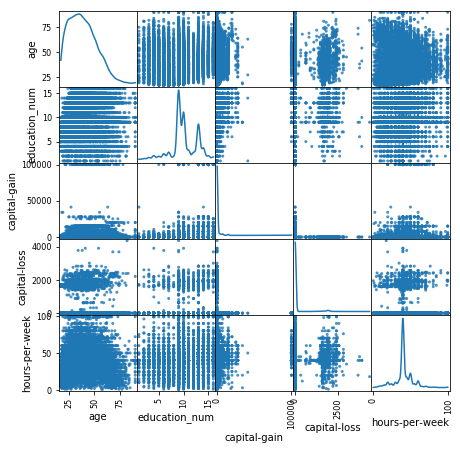

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_clean, alpha = 0.8, figsize=(7, 7), diagonal='kde')
print(df_clean.corr())

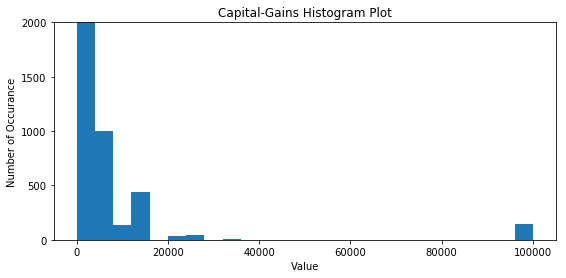

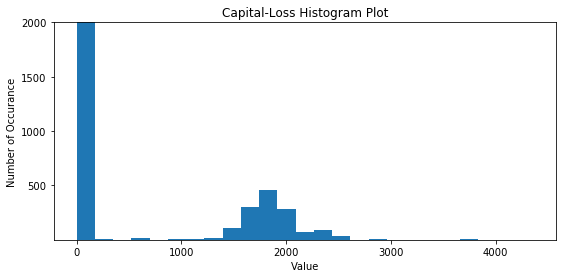

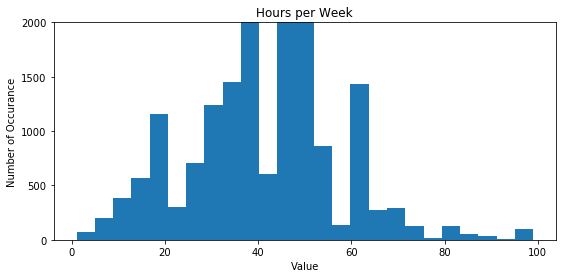

In [17]:
'''Plotting some of the variables to see if the
data is skewed or not'''
# Histogram plot of Capital Gains
plt.figure(figsize=(9,4))
plt.hist(df_clean['capital-gain'], bins = 25)
plt.ylim((0,2000))
plt.yticks([0, 500, 1000, 1500, 2000])
plt.xlabel('Value')
plt.ylabel('Number of Occurance')
plt.title('Capital-Gains Histogram Plot')
plt.show()

# Histogram Plot of Capital Loss
plt.figure(figsize=(9,4))
plt.hist(df_clean['capital-loss'], bins = 25)
plt.ylim((0,2000))
plt.yticks([500, 1000, 1500, 2000])
plt.xlabel('Value')
plt.ylabel('Number of Occurance')
plt.title('Capital-Loss Histogram Plot')
plt.show()

# Histogram Plot of Hours Per week 
plt.figure(figsize=(9,4))
plt.hist(df_clean['hours-per-week'], bins = 25)
plt.ylim((0,2000))
plt.yticks([0, 500, 1000, 1500, 2000])
plt.xlabel('Value')
plt.ylabel('Number of Occurance')
plt.title('Hours per Week')
plt.show()





In [18]:
# Splitting the data between features and target 

income_normal = df_clean['income']
features_normal = df_clean.drop('income', axis=1)


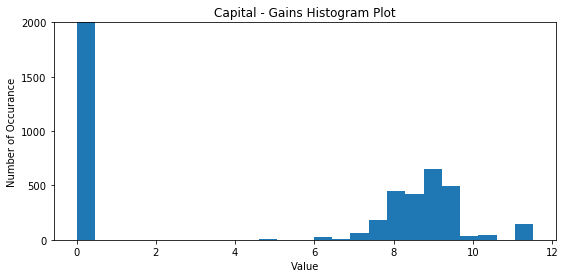

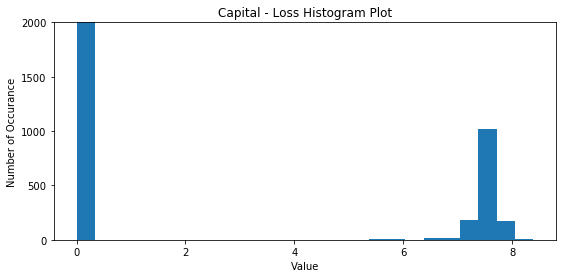

In [19]:
'''Since we have highly skewed data in capital gains and losses
it is better to apply logarithmic function for our machine learning
algorithms to perform well'''

logarithmic = lambda x: np.log(x+1)
features_normal[['capital-gain', 'capital-loss']] = df_clean[['capital-gain', 'capital-loss']].apply(logarithmic)

plt.figure(figsize=(9,4))
plt.hist(features_normal['capital-gain'], bins = 25)
plt.ylim((0,2000))
plt.yticks([0, 500, 1000, 1500, 2000])
plt.xlabel('Value')
plt.ylabel('Number of Occurance')
plt.title('Capital - Gains Histogram Plot')
plt.show()

plt.figure(figsize=(9,4))
plt.hist(features_normal['capital-loss'], bins = 25)
plt.ylim((0,2000))
plt.yticks([0, 500, 1000, 1500, 2000])
plt.xlabel('Value')
plt.ylabel('Number of Occurance')
plt.title('Capital - Loss Histogram Plot')
plt.show()

#skewed = ['capital-gain', 'capital-loss']
#features_normal[skewed] = df_clean[skewed].apply(lambda x: np.log(x+1))

#

In [20]:
'''Importing MinMaxScaler for normalizing numerical 
features so each feature can be treated equally'''
from sklearn.preprocessing import MinMaxScaler

# Fitting the classifier 

scaler = MinMaxScaler()
numerical_values = ['age', 'education_num', 'capital-gain', 'capital-loss',
                   'hours-per-week']
features_normal[numerical_values] = scaler.fit_transform(df_clean[numerical_values])
features_normal.head()



,age,workclass,education,education_num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba


As we can see we need one more thing to do in our dataset which is changing income variable to numerical value for our machine learning algorithms to understand. We have >50k and <50k we need change this to 0 and 1 values. We will use pandas dummies and do one-hot encoding. 

In [21]:
# Using pandas dummies to encode the data 
features = pd.get_dummies(features_normal)

# Applying zeros and ones to income variable 
zeros_one = lambda x: 1 if x == ' >50K' else 0
income = income_normal.apply(zeros_one)
encoded = list(features.columns)

# Printing the number of features in our new dataset! 
print "{} number of features applied one-hot encoding.".format(len(encoded))

103 number of features applied one-hot encoding.


## Splitting Data
We need to split our data to train test set so we can train our algorithms and then test the algorithms to get their accuracy, f1 score etc. Now we can use sklearn train_test_split function to split our data to test set and train set.

In [22]:
# Importing the train test split from sklearn for splitting the data!
from sklearn.cross_validation import train_test_split

# Splitting the data 
x_train, x_test, y_train, y_test = train_test_split(features, income,
                                                   test_size = 0.2, random_state = 0)
print('Number of trainig set sample: {}'.format(x_train.shape[0]))
print('Number of test set sample: {}'.format(x_test.shape[0]))

Number of trainig set sample: 24129
Number of test set sample: 6033


In [23]:
from datetime import datetime
'''After splitting our data now we can start training our 
algorithms and start getting the result.'''

start_1 = datetime.now()
# Importing requires algorithms
from sklearn.naive_bayes import GaussianNB

# Fitting the Gaussian classifier 
class_gaus = GaussianNB()
class_gaus.fit(x_train, y_train)
end_1 = datetime.now()
time_1 = end_1 - start_1 

In [24]:
start_2 = datetime.now()

# Fitting and trainig SVC classifier
from sklearn.svm import SVC
class_svc = SVC()
class_svc.fit(x_train, y_train)

end_2 = datetime.now()
time_2 = end_2 - start_2 

In [25]:
start_3 = datetime.now()

# Fitting and training Adaboost Learning
from sklearn.ensemble import AdaBoostClassifier
class_ada = AdaBoostClassifier(random_state = 0)
class_ada.fit(x_train, y_train)

end_3 = datetime.now()
time_3 = end_3 - start_3 


In [26]:
start_4 = datetime.now()

# Fitting and training the data with KNN K is 5 by default 
from sklearn.neighbors import KNeighborsClassifier
class_knn = KNeighborsClassifier()
class_knn.fit(x_train, y_train)

end_4 = datetime.now()
time_4 = end_4 - start_4

In [27]:
start_5 = datetime.now()

# Fitting the training data with Decision Tree 
from sklearn.tree import DecisionTreeClassifier
class_decision = DecisionTreeClassifier()
class_decision.fit(x_train, y_train)

end_5 = datetime.now()
time_5 = end_5 - start_5

In [28]:
# Calculating the time 
print('Time it takes the train the GaussianNB algorithm:{}'.format(time_1))
print('Time it takes the train the SVC algorithm:{}'.format(time_2))
print('Time it takes the train the Adaboost algorithm:{}'.format(time_3))
print('Time it takes the train the KNN algorithm:{}'.format(time_4))
print('Time it takes the train the Decision Tree algorithm:{}'.format(time_5))

Time it takes the train the GaussianNB algorithm:0:00:00.081970
Time it takes the train the SVC algorithm:0:00:45.032409
Time it takes the train the Adaboost algorithm:0:00:00.867648
Time it takes the train the KNN algorithm:0:00:00.452000
Time it takes the train the Decision Tree algorithm:0:00:00.265098


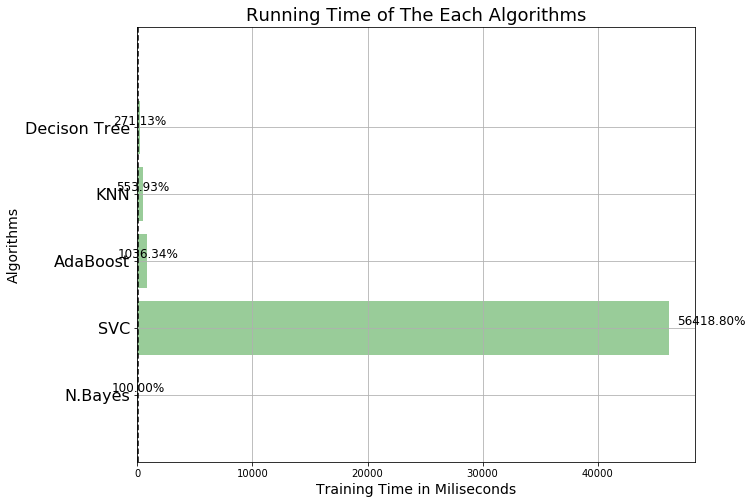

In [37]:
data = [81.866, 46187.815, 848.413, 453.483, 221.961]

bar_labels = ['N.Bayes', 'SVC', 'AdaBoost', 'KNN', 'Decison Tree']

fig = plt.figure(figsize=(10,8))

# plot bars
y_pos = np.arange(len(data))
plt.yticks(y_pos, bar_labels, fontsize=16)
bars = plt.barh(y_pos, data,
         align='center', alpha=0.4, color='g')

# annotation and labels

for b,d in zip(bars, data):
    plt.text(b.get_width() + b.get_width()*0.08, b.get_y() + b.get_height()/2,
        '{0:.2%}'.format(d/min(data)), 
        ha='center', va='bottom', fontsize=12)

plt.xlabel('Training Time in Miliseconds', fontsize=14)
plt.ylabel('Algorithms', fontsize=14)
t = plt.title('Running Time of The Each Algorithms', fontsize=18)
plt.ylim([-1,len(data)+0.5])
plt.vlines(min(data), -1, len(data)+0.5, linestyles='dashed')
plt.grid()

plt.show()

In [30]:
# Getting the precision, recall, accuracy, and f1 score for each model 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
predict_1 = class_gaus.predict(x_test)
predict_2 = class_svc.predict(x_test)
predict_3 = class_ada.predict(x_test)
predict_4 = class_knn.predict(x_test)
predict_5 = class_decision.predict(x_test)
gaus_accuracy = accuracy_score(y_test, predict_1)
gaus_f1 = f1_score(y_test, predict_1)
gaus_recall = recall_score(y_test, predict_1)
gaus_precision = precision_score(y_test, predict_1)
svc_accuracy = accuracy_score(y_test, predict_2)
svc_f1 = f1_score(y_test, predict_2)
svc_recall = recall_score(y_test, predict_2)
svc_precison = precision_score(y_test, predict_2)
ada_accuracy = accuracy_score(y_test, predict_3)
ada_f1 = f1_score(y_test, predict_3)
ada_recall = recall_score(y_test, predict_3)
ada_precision = precision_score(y_test, predict_3)
knn_accuracy = accuracy_score(y_test, predict_4)
knn_f1 = f1_score(y_test, predict_4)
knn_recall = recall_score(y_test, predict_4)
knn_precision = precision_score(y_test, predict_4)
decision_accuracy = accuracy_score(y_test, predict_5)
decision_f1 = f1_score(y_test, predict_5)
decision_recall = recall_score(y_test, predict_5)
decision_precision = precision_score(y_test, predict_5)
print('-------------------------------------')
print('Gaussian Accuracy score: {}'.format(accuracy_score(y_test, predict_1)))
print('Gaussian F-1 score: {}'.format(f1_score(y_test, predict_1)))
print('Gaussian Recall score: {}'.format(recall_score(y_test, predict_1)))
print('Gaussian Precision score: {}'.format(precision_score(y_test, predict_1)))
print('-------------------------------------')
print('SVC Accuracy score: {}'.format(accuracy_score(y_test, predict_2)))
print('SVC F-1 score: {}'.format(f1_score(y_test, predict_2)))
print('SVC Recall score: {}'.format(recall_score(y_test, predict_2)))
print('SVC Precision score: {}'.format(precision_score(y_test, predict_2)))
print('-------------------------------------')
print('AdaBoost Accuracy score: {}'.format(accuracy_score(y_test, predict_3)))
print('AdaBoost F-1 score: {}'.format(f1_score(y_test, predict_3)))
print('AdaBoost Recall score: {}'.format(recall_score(y_test, predict_3)))
print('AdaBoost Precision score: {}'.format(precision_score(y_test, predict_3)))
print('-------------------------------------')
print('KNN Accuracy score: {}'.format(accuracy_score(y_test, predict_4)))
print('KNN F-1 score: {}'.format(f1_score(y_test, predict_4)))
print('KNN Recall score: {}'.format(recall_score(y_test, predict_4)))
print('KNN Precision score: {}'.format(precision_score(y_test, predict_4)))
print('-------------------------------------')
print('Decision Tree Accuracy score: {}'.format(accuracy_score(y_test, predict_5)))
print('Decision Tree F-1 score: {}'.format(f1_score(y_test, predict_5)))
print('Decision Tree Recall score: {}'.format(recall_score(y_test, predict_5)))
print('Decision Precision score: {}'.format(precision_score(y_test, predict_5)))

-------------------------------------
Gaussian Accuracy score: 0.444223437759
Gaussian F-1 score: 0.464291420355
Gaussian Recall score: 0.968021319121
Gaussian Precision score: 0.305380411938
-------------------------------------
SVC Accuracy score: 0.830101110559
SVC F-1 score: 0.596932756587
SVC Recall score: 0.505662891406
SVC Precision score: 0.728406909789
-------------------------------------
AdaBoost Accuracy score: 0.849991712249
AdaBoost F-1 score: 0.67245747376
AdaBoost Recall score: 0.61892071952
AdaBoost Precision score: 0.736133122029
-------------------------------------
KNN Accuracy score: 0.818498259572
KNN F-1 score: 0.609068189932
KNN Recall score: 0.568287808128
KNN Precision score: 0.656153846154
-------------------------------------
Decision Tree Accuracy score: 0.815680424333
Decision Tree F-1 score: 0.622539035981
Decision Tree Recall score: 0.6109260493
Decision Precision score: 0.634602076125


In [31]:
# Putting all the data into dataframe format 
raw_data = {'algo': ['Accuracy', 'Recall', 'Precision', 'F-1'],
           'Naive Bayes' : [0.4442, 0.4642, 0.9680, 0.3053],
           'SVC': [0.8301, 0.5969, 0.5056, 0.7284],
           'AdaBoost': [0.8499, 0.6724, 0.6189, 0.7361],
           'KNN': [0.8184, 0.6090, 0.5682, 0.6561],
           'Tree': [0.8161, 0.6231, 0.6109, 0.6459]}
df_scores = pd.DataFrame(raw_data, columns =['algo', 'Naive Bayes', 'SVC', 'AdaBoost', 'KNN', 'Tree'])
df_scores

,algo,Naive Bayes,SVC,AdaBoost,KNN,Tree
0,Accuracy,0.4442,0.8301,0.8499,0.8184,0.8161
1,Recall,0.4642,0.5969,0.6724,0.6090,0.6231
2,Precision,0.9680,0.5056,0.6189,0.5682,0.6109
3,F-1,0.3053,0.7284,0.7361,0.6561,0.6459


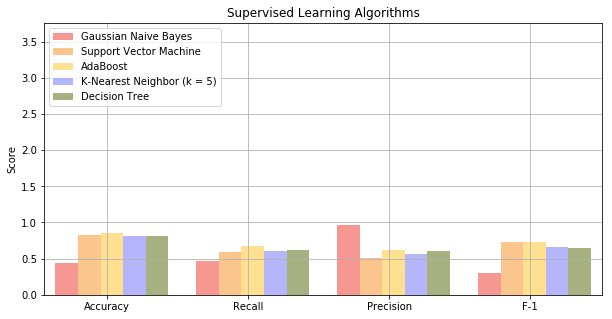

In [32]:
# Setting the positions and width for the bars
pos = list(range(len(df_scores['Naive Bayes']))) 
width = 0.16 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Creating a bar with Naive Bayes data,
# in position pos,
plt.bar(pos, 
        #using df['Naive Bayes'] data,
        df_scores['Naive Bayes'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in algo
        label=df_scores['algo'][0]) 

# Create a bar with SVC data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['SVC'] data,
        df_scores['SVC'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in algo
        label=df_scores['algo'][1]) 

# Create a bar with AdaBoost data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['AdaBoost'] data,
        df_scores['AdaBoost'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=df_scores['algo'][2])

# Create a bar with KNN data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using df['KNN'] data,
        df_scores['KNN'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#6C6CF8', 
        # with label the third value in first_name
        label=df_scores['algo'][3]) 

# Create a bar with Tree data,
# in position pos + some width buffer,
plt.bar([p + width*4 for p in pos], 
        #using df['Tree'] data,
        df_scores['Tree'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#506401', 
        # with label the third value in first_name
        label=df_scores['algo'][3])



# Seting the y axis label
ax.set_ylabel('Score')

# Seting the chart's title
ax.set_title('Supervised Learning Algorithms')

# Seting the position of the x ticks
ax.set_xticks([p + 1.8 * width for p in pos])

# Seting the labels for the x ticks
ax.set_xticklabels(df_scores['algo'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, max(df_scores['Naive Bayes'] + df_scores['SVC'] + df_scores['AdaBoost'] + df_scores['KNN'] + df_scores['Tree'])] )

# Adding the legend and showing the plot
plt.legend(['Gaussian Naive Bayes', 'Support Vector Machine', 'AdaBoost', 'K-Nearest Neighbor (k = 5)', 'Decision Tree'], loc='upper left')
plt.grid()
plt.show()

In [29]:
accuracy_scores = pd.DataFrame([0.44422, 0.830101, 0.84999, 0.818498, 0.813028], columns=['accuracy'])
f1_scores = pd.DataFrame([0.464291, 0.596932, 0.672457, 0.6090681, 0.615541], columns=['f1'])
recall_scores = pd.DataFrame([0.968021, 0.50566, 0.61892, 0.56828, 0.601598], columns=['recall'])
precisoin_scores = pd.DataFrame([])